In [2]:
# Encabezado: cargar librerías
%matplotlib inline
import numpy as np                # Librería para funciones matemáticas
import matplotlib.pyplot as plt   # Librería para graficos
import matplotlib.cm as cm        # Módulo para controlar mapas de colores


# Librerías de calculo de integrales 
import scipy.integrate as integr


# Integración de funciones

## Integración en un intervalo finito

Para integrar numéricamente una función en un intervalo finito, usamos la rutina quad. Esta toma tres argumentos:
* Una función de un argumento
* un límite inferior
* un límite superior

Por ejemplo, para integrar una gaussiana en el intervalo $(0,1)$,
```
def fun(x):
    return np.exp(-x**2)

integr.quad(fun,0.,1.)
```

O, usando funciones anónimas,
```
integr.quad(lambda x:np.exp(-x**2),0.,1.)
```
que da como resultado el par de números

(0.7468241328124271, 8.291413475940725e-15)

El primer número es el valor de la integral, y el segundo el error estimado en la evaluación.

In [89]:
def fun(x):
    return np.exp(-x**2)

integr.quad(fun,0.,1.)

(0.7468241328124271, 8.291413475940725e-15)

In [90]:
integr.quad(lambda x:np.exp(-x**2),0.,1.)


(0.7468241328124271, 8.291413475940725e-15)

En ocasiones, conviene definir la función a integrar como dependiente de parámetros. Por ejemplo

```
def fun(x,a):
    return x**a
```
Para integrar esta función, debemos asignarle un valor a $a$ en la rutina. Esto lo hacemos vía el parámetro "args":
```
integr.quad(fun,0.,1.,args=(2,))
```
que devuelve

(0.33333333333333337, 3.700743415417189e-15)

Podemos usar esto para armar tablas de valores de la integral dependiendo del parámetro:

```
[integr.quad(fun,0.,1.,args=(m,))[0] for m in range(0,5)]
```
que devuelve

[1.0,
 0.5,
 0.33333333333333337,
 0.25,
 0.2]


In [92]:
def fun(x,a):
    return x**a

[integr.quad(fun,0.,1.,args=(m,))[0] for m in range(0,5)]


[1.0, 0.5, 0.33333333333333337, 0.25, 0.2]

## Integrales impropias


A veces, nos interesa evaluar integrales con límites en $\pm\infty$. Para esto, usamos la constantes de numpy 
$np.inf$:


```
integr.quad(lambda x:np.exp(-x**2)/np.sqrt(np.pi),-np.inf,np.inf)
```
que devuelve
(1.0, 8.012979937383924e-09)

## Integrales multidimensionales

Para evaluar integrales en más de una variable, podemos trabajar (usando el teorema de Fubini) con integrales iteradas:

```
integr.quad(lambda y:integr.quad(lambda x,y:np.exp(-x**2-y**2)/np.pi,-1,1, args=(y,))[0],-1,1)
```

(0.7101446264380782, 7.88418915085385e-15)

Sin embargo, esto tiene algunos problemas tanto en eficiencia y convergencia, como en la estimación del error de integración. Una mejor opción es usar la rutina "dblquad"

```
integrate.dblquad(lambda x,y:np.exp(-x**2-y**2)/np.pi, -1, 1, lambda x: -1, lambda x: 1)
```


Otra alternativa, útil en casos de integrales múltiples es usar "nquad"

```
integr.nquad(lambda x,y:np.exp(-x**2-y**2)/np.pi, ranges=[[-1.,1.],[-1.,1.]])
```



In [134]:
res1 = integr.quad(lambda y:integr.quad(lambda x,y:np.exp(-x**2-y**2)/np.pi,-1,1, args=(y,))[0],-1,1)


res2 = integr.dblquad(lambda x,y:np.exp(-x**2-y**2)/np.pi, -1, 1, lambda x: -1, lambda x: 1)

res3 = integr.nquad(lambda x,y:np.exp(-x**2-y**2)/np.pi, ranges=[[-1.,1.],[-1.,1.]])
print(res1)
print(res2)
print(res3)

(0.7101446264380782, 7.88418915085385e-15)
(0.7101446264380782, 7.88418915085385e-15)
(0.7101446264380782, 7.88418915085385e-15)



# Integración de ecuaciones diferenciales ordinarias (ODEs)

## Integración de ODEs de primer orden

La ecuación general de primer orden es de la forma
$$
\vec{y}'(t)=F[t,\vec{y}]
$$
para una cierta función $F(t,\vec{y})$. Aquí, $\vec{y}\in \mathbb{R}^n$ y $F:\mathbb{R}\times \mathbb{R}^n\rightarrow \mathbb{R}^n$ 

Para integrar ecuaciones diferenciales de primer orden utilizamos la rutina *solve_ivp*. Esta rutina toma como argumentos una función $F$, un intervalo $(t_0,t_f)$ y una condición inicial $\vec{y}(t_0)\in \mathbb{R}^n$. 
En particular, si buscamos resolver una ecuación para una función $y:\mathbb{R}\rightarrow \mathbb{R}$, 
asumimos que $n=1$.

Podemos definir la función F como una función de python vía
```
def fun(t,y):
    return np.array([t**2-y[0]])
```
y luego llamar a la rutina de integración como

```
res = integr.solve_ivp(fun, np.array([0.,6.]),np.array([1.]))
```

o bien, pasarla de forma implícita usando las "funciones anónimas"

```
res = integr.solve_ivp(lambda t,y: np.array([t**2-y[0]]), np.array([0.,6.]),np.array([1.]))
```

Veamos el ejemplo de la ecuación lineal de primer orden

$$
y'(t)=-\alpha y(t)
$$
cuya solución es de la forma $y(t)=C  \exp(-\alpha t)$ con $C$ una constante a fijar de las condiciones iniciales. En particular, si $y(0)=1.\Rightarrow C=1$

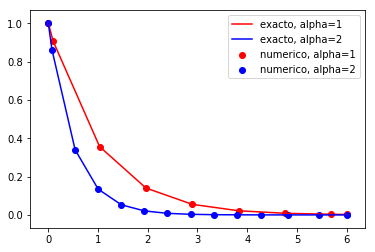

In [66]:
# Integrar ODEs


# ODE de primer orden


# Resuelve la ecuación  y'= -alpha y   con factor de decaimiento alpha=1.



res = integr.solve_ivp(lambda t,y: -1.*y, np.array([0.,6.]),np.array([1.]))

plt.plot(res.t,np.exp(-res.t),label="exacto, alpha=1",c="red")
plt.scatter(res.t,res.y[0],label="numerico, alpha=1",c="red")


# Resuelve la ecuación  y'= -alpha y   con factor de decaimiento alpha=2.

res = integr.solve_ivp(lambda t,y: -2.*y, np.array([0.,6.]),np.array([1.]))

plt.plot(res.t,np.exp(-2*res.t),label="exacto, alpha=2",c="blue")
plt.scatter(res.t,res.y[0],label="numerico, alpha=2",c="blue")

plt.legend()
plt.show()

## Integraciónd de ODEs de segundo orden

La idea es convertir una ODE de segundo orden en una ODE de primer orden, en un espacio de mayor dimensión. Para esto, reescribimos la ecuación
$$
y''(t)= F(t,y(t))
$$

como un sistema de ecuaciones acopladas
$$
y'(t)= v(t)
$$
$$
v'(t)= F(t,y(t))
$$
introduciendo la "variable auxiliar" $v(t)$. Nótese que ahora se requieren dos condiciones iniciales, una para $y(t_0)$ y otra para $y'(t_0)=v(t_0)$.


Resolvamos la ecuación para el caso lineal
$$
y''(t)=- w^2 y(t)
$$

que se reformula como
$$
y'(t)=v(t)    \;\; v(t)=- w^2 y(t)   
$$
Las soluciones son de la forma $y(t)=A \cos(w t) + B \sin(w t)$, $v(t)=-A \sin(w t) + B \cos(w t)$, con $A$ y $B$ dos parámetros a fijar a partir de las condiciones iniciales. Si fijamos $y(0)=1$, $y'(0)=0\Rightarrow A=1$, $B=0$ y por lo tanto,

$$
y(t)=\cos(w t)
$$





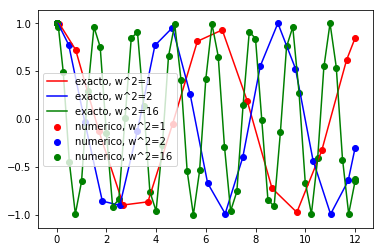

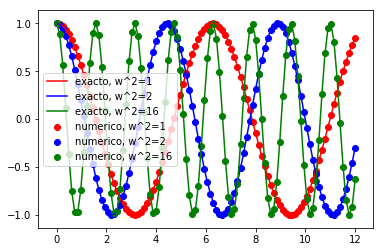

In [67]:


# ODE de segundo  orden


# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento alpha=1.



# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=1.

res = integr.solve_ivp(lambda t,y: [y[1],-y[0]], np.array([0.,12.]),np.array([1.,0.]))

plt.plot(res.t,np.cos(res.t),label="exacto, w^2=1",c="red")
plt.scatter(res.t,res.y[0],label="numerico, w^2=1",c="red")


# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=2.

res = integr.solve_ivp(lambda t,y: [y[1],-2.*y[0]], np.array([0.,12.]),np.array([1.,0.]))

plt.plot(res.t,np.cos(np.sqrt(2)*res.t),label="exacto, w^2=2",c="blue")
plt.scatter(res.t,res.y[0],label="numerico, w^2=2",c="blue")


# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=16.

res = integr.solve_ivp(lambda t,y: [y[1],-16.*y[0]], np.array([0.,12.]),np.array([1.,0.]))

plt.plot(res.t,np.cos(np.sqrt(16)*res.t),label="exacto, w^2=16",c="green")
plt.scatter(res.t,res.y[0],label="numerico, w^2=16",c="green")



plt.legend()
plt.show()


# Para mejorar el resultado, definir la integración sobre más puntos vía el parámetro t_eval:



# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=1.

res = integr.solve_ivp(lambda t,y: [y[1],-y[0]], np.array([0.,12.]),np.array([1.,0.]),t_eval=np.linspace(0,12,100))

plt.plot(res.t,np.cos(res.t),label="exacto, w^2=1",c="red")
plt.scatter(res.t,res.y[0],label="numerico, w^2=1",c="red")


# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=2.

res = integr.solve_ivp(lambda t,y: [y[1],-2.*y[0]], np.array([0.,12.]),np.array([1.,0.]),t_eval=np.linspace(0,12,100))

plt.plot(res.t,np.cos(np.sqrt(2)*res.t),label="exacto, w^2=2",c="blue")
plt.scatter(res.t,res.y[0],label="numerico, w^2=2",c="blue")


# Resuelve la ecuación  y''= -w^2 y   con factor de decaimiento w^2=16.

res = integr.solve_ivp(lambda t,y: [y[1],-16.*y[0]], np.array([0.,12.]),np.array([1.,0.]),t_eval=np.linspace(0,12,100))

plt.plot(res.t,np.cos(np.sqrt(16)*res.t),label="exacto, w^2=16",c="green")
plt.scatter(res.t,res.y[0],label="numerico, w^2=16",c="green")

plt.legend()
plt.show()

